In [31]:
import os
import cv2
frame_dir = 'video_segmentation/frames'
scenes = os.listdir(frame_dir)
image_dict = {}
for scene in scenes:
    for image in os.listdir(frame_dir+'/'+scene):
        image_dict[image] = cv2.imread(frame_dir+'/'+scene+'/'+image)

In [33]:
print(image_dict.keys())

dict_keys(['00026514.jpg.right', '00026532.jpg.right', '00026496.jpg', '00026508.jpg.right', '00026523.jpg.right', '00026504.jpg', '00026511.jpg.right', '00026520.jpg', '00026531.jpg.right', '00026539.jpg.right', '00026527.jpg', '00026533.jpg', '00026534.jpg.right', '00026502.jpg', '00026537.jpg', '00026543.jpg', '00026528.jpg', '00026503.jpg.right', '00026505.jpg.right', '00026504.jpg.right', '00026519.jpg.right', '00026527.jpg.right', '00026500.jpg.right', '00026491.jpg.right', '00026525.jpg', '00026529.jpg.right', '00026536.jpg', '00026516.jpg', '00026517.jpg', '00026530.jpg.right', '00026506.jpg', '00026489.jpg', '00026487.jpg', '00026499.jpg', '00026517.jpg.right', '00026493.jpg.right', '00026488.jpg.right', '00026495.jpg.right', '00026526.jpg', '00026508.jpg', '00026537.jpg.right', '00026516.jpg.right', '00026490.jpg.right', '00026499.jpg.right', '00026520.jpg.right', '00026533.jpg.right', '00026529.jpg', '00026542.jpg', '00026541.jpg', '00026521.jpg.right', '00026509.jpg.right',

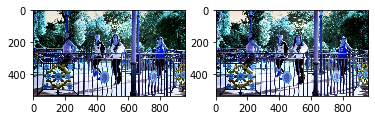

In [40]:
from matplotlib import pyplot as plt
current_image = '00027427.jpg'
f, axarr = plt.subplots(1,2)
axarr[0].imshow(image_dict[current_image])
axarr[1].imshow(image_dict[current_image+'.right'])
plt.show()


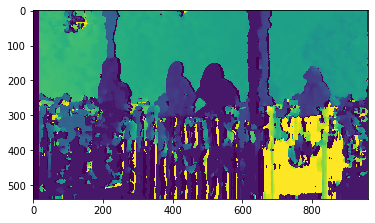

In [46]:
import numpy as np

imgL = image_dict[current_image]
imgR = image_dict[current_image+'.right']


imgRBW = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
imgLBW = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)

stereo = cv2.StereoSGBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgRBW,imgLBW)
    # L and R are swapped from the specifications of the cv2 funcs.
    # Also, the street dance dataset has divergent paralax between the foregound and background.
plt.imshow(disparity)
plt.show()